# Recommender System

@author: Gabriel Samarane Ribeiro

The porpuse of this notebook is to create a simple movie recommendation model using python!

All of the significant parts of the process were divided into modules:

1) **Collecting the data**

2) **Exploratory Data Analysis**

3) **Recommender Model**


Throughout this notebook are some explanations about the code itself as well as comparissons with other data technologies such as SQL.

In [1]:
#Importing the necessary libraries for data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Collecting the data from their respective CSV files

In [2]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('Data/u.data', sep='\t', names=column_names)

In [3]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [4]:
movies = pd.read_csv('Data/Movie_Id_Titles',index_col='item_id')
movies.head()

,title
item_id,
1,Toy Story (1995)
2,GoldenEye (1995)
3,Four Rooms (1995)
4,Get Shorty (1995)
5,Copycat (1995)


### Exploratory Data Analysis

This section starts by merging the two dataframes together on the item_id column.

This operation between DataFrames can be thought of as an operation between two Tables, exactly like you would see in SQL:
    
**df INNER JOIN movies ON 'item_id'**

In [5]:
df = pd.merge(df,movies,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


The second step is now to do some String manipulation on the title column to create a new column called "year".

In [6]:
def check_parenthesis(text):
     return (text[-6:].startswith('(') and text[-6:].endswith(')'))
    
df_test = df[df['title'].apply(check_parenthesis) == False]

df_test

,user_id,item_id,rating,timestamp,title
84859,130,267,5,875801239,unknown
84860,5,267,4,875635064,unknown
84861,268,267,3,875742077,unknown
84862,297,267,3,875409139,unknown
84863,319,267,4,875707690,unknown
84864,1,267,4,875692955,unknown
84865,532,267,3,875441348,unknown
84866,833,267,1,875655669,unknown
84867,422,267,4,875655986,unknown
96355,181,1128,1,878962279,Heidi Fleiss: Hollywood Madam (1995)


A film with no title was found! That can cause problems in the recommendation system so the correct decision here is to remove it, thankfully it's a very small part of the dataset so it wont impact significantlly the model.

This is the same as the WHERE operator in SQL:

SELECT * 

FROM df

WHERE title != 'unknown'


In [7]:
df = df[df['title'] != 'unknown']

Some other films appear to fail the parenthesis check test to see if it's possible to extract their year so that needs to be explored.

The last dataframe showed that the movie called "Heidi Fleiss: Hollywood Madam (1995)" has also failed the test eventhough it appears to have no problems.

But when trying to access the data referent to this movie the dataframe was NULL.

In [8]:
df[df['title'] == 'Heidi Fleiss: Hollywood Madam (1995)']

,user_id,item_id,rating,timestamp,title


This probably means that the title was incorrectly entered in the database, thus the error must be found.

In this case, the error was an extra blank space at the end of the title.

To resolve the problem, a lambda expression can be used to remove the last character.

In [9]:
df['title'] = df['title'].apply(lambda t : t[:-1] if t == 'Heidi Fleiss: Hollywood Madam (1995) ' else t)

Applying the test once again


In [10]:
df[df['title'].apply(check_parenthesis) == False]

,user_id,item_id,rating,timestamp,title
99269,194,1412,2,879551921,Land Before Time III: The Time of the Great Gi...
99270,864,1412,1,888892461,Land Before Time III: The Time of the Great Gi...
99271,405,1412,1,885549005,Land Before Time III: The Time of the Great Gi...
99272,882,1412,3,879867368,Land Before Time III: The Time of the Great Gi...
99273,870,1412,2,879714435,Land Before Time III: The Time of the Great Gi...
99274,541,1412,1,883874834,Land Before Time III: The Time of the Great Gi...
99947,655,1635,3,887432079,Two Friends (1986)
99964,90,1201,5,891383687,Marlene Dietrich: Shadow and Light (1996)


Mantaining the correction process until all the movies pass the test

In [11]:
df[df['item_id'] == 1412]['title'].values

array(['Land Before Time III: The Time of the Great Giving (1995) (V)',
       'Land Before Time III: The Time of the Great Giving (1995) (V)',
       'Land Before Time III: The Time of the Great Giving (1995) (V)',
       'Land Before Time III: The Time of the Great Giving (1995) (V)',
       'Land Before Time III: The Time of the Great Giving (1995) (V)',
       'Land Before Time III: The Time of the Great Giving (1995) (V)'],
      dtype=object)

In [12]:
df['title'] = df['title'].apply(lambda t : t[:-4] if t == 'Land Before Time III: The Time of the Great Giving (1995) (V)' else t)
df['title'] = df['title'].apply(lambda t : t[:-1] if t == 'Two Friends (1986) ' else t)
df['title'] = df['title'].apply(lambda t : t[:-1] if t == 'Marlene Dietrich: Shadow and Light (1996) ' else t)

Now, finally, creating the year column on the dataframe

In [13]:
df['year'] = df['title'].apply(lambda t : int(t[-5:-1]))
df.head(3)

,user_id,item_id,rating,timestamp,title,year
0,0,50,5,881250949,Star Wars (1977),1977
1,290,50,5,880473582,Star Wars (1977),1977
2,79,50,4,891271545,Star Wars (1977),1977


Now let's use some plots to help with feature visualization, starting with the distribuition of ratings across the movies.

To do this, first, it's necessary to do some data manipulation in order to get the values for the plots.
The first manipulation is just a GROUP BY operation used to get the mean of the ratings for each individual film, once again, analogous to SQL.

**SELECT title, AVG(rating) as avg_rating**

**FROM df**

**GROUP BY 'item_id';**


In [14]:
mean_rating_per_film = df.groupby('title')['rating'].mean()

The second plot is very similar to the first one, again using a GROUP BY operation, but this time to get the count of ratings for each individual film.


**SELECT title, COUNT(rating) as count_rating**

**FROM df**

**GROUP BY 'item_id';**

In [15]:
count_rating_per_film = df.groupby('title')['rating'].count()

Creating a Dataframe with the new variables

In [16]:
ratings = pd.DataFrame(mean_rating_per_film)
ratings.head(3)

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257


In [17]:
ratings['rating_count'] = count_rating_per_film
ratings.head(3)

,rating,rating_count
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109


**PLOTTING THE GRAPHS**

<AxesSubplot:xlabel='rating', ylabel='Count'>

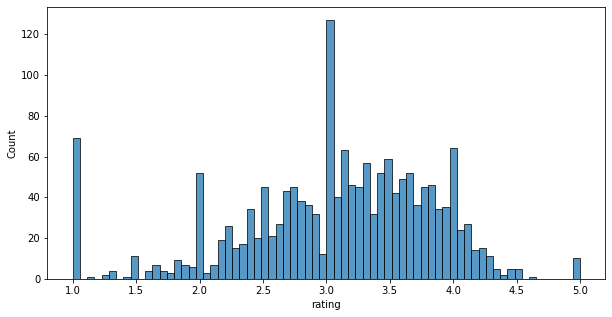

In [41]:
plt.figure(figsize=(10,5))
sns.histplot(ratings['rating'], bins=70)

<AxesSubplot:xlabel='rating_count', ylabel='Count'>

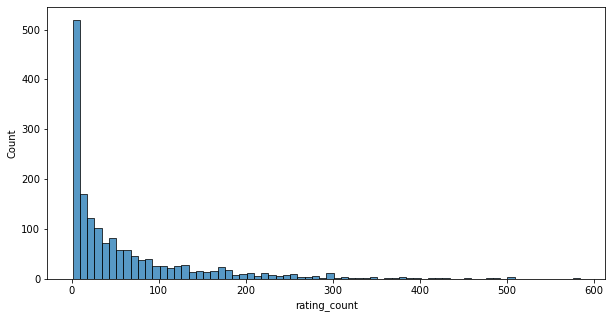

In [19]:
plt.figure(figsize=(10,5))
sns.histplot(ratings['rating_count'], bins=70)

<Figure size 720x360 with 0 Axes>

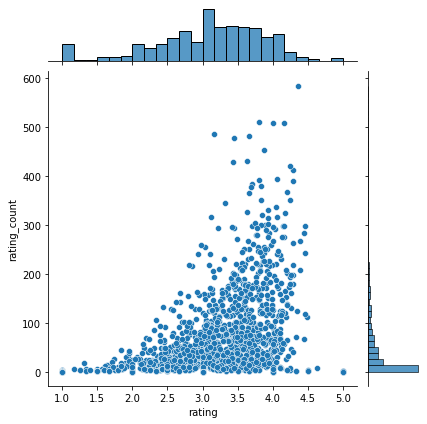

In [39]:
plt.figure(figsize=(10,5))
sns.jointplot(y = ratings['rating_count'], x = ratings['rating'])

### RECOMMENDER SYSTEM

The recommendation system is very simple, it's based around the ideia of finding a linear correlation between films and recommending a new film to the user based on these correlations.

The first step is to create a pivot table to represent the ratings each individual user gave to each individual film, the great number of _NULL_ values comes from the fact that not all the users saw every movie.

In [21]:
user_rating_matrix = df.pivot_table(values='rating',columns='title',index='user_id')
user_rating_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Wyatt Earp (1994),Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The second step in this case is to choose a film to demonstrate how it's linear relation to other is calculated.
To do so, we first need to find the movies with the largest number of reviews.

In [22]:
ratings.sort_values('rating_count',ascending=False).head(10)

,rating,rating_count
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


The choosen film was, in this case, Star Wars 

In [23]:
star_wars = user_rating_matrix['Star Wars (1977)']
star_wars

user_id
0      5.0
1      5.0
2      5.0
3      NaN
4      5.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 944, dtype: float64

In [24]:
df.head()

,user_id,item_id,rating,timestamp,title,year
0,0,50,5,881250949,Star Wars (1977),1977
1,290,50,5,880473582,Star Wars (1977),1977
2,79,50,4,891271545,Star Wars (1977),1977
3,2,50,5,888552084,Star Wars (1977),1977
4,8,50,5,879362124,Star Wars (1977),1977


Analyzing the linear correlation between the Star Wars movie ratings and the other movie ratings

In [25]:
corr_star_wars = user_rating_matrix.corrwith(star_wars)
corr_star_wars

C:\Users\GABRIEL\anaconda3\lib\site-packages\numpy\lib\function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\GABRIEL\anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns (1988)                        0.186377
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1663, dtype: float64

Another useful feature, to compare and incorporate in the final recommendation, is the year the movie was released.

Eventhough the year is mentioned in the title, it's still important to extract it using code, not only for learning purposes but also because other datasets might not include the year of the movie in the title

In [26]:
star_wars_year = int(df[df['title'] == 'Star Wars (1977)']['year'][0])
star_wars_year

1977

Calculating the year similarity in a new DataFrame by normalizing the difference between the release dates

In [27]:
year_df = df.drop(['user_id','timestamp','rating','item_id'], axis=1)

year_df.drop_duplicates(subset='title',inplace=True)

year_df.index = year_df['title']

year_diff = np.abs(star_wars_year - year_df['year'])

year_df['year_corr'] = 1/(1 + year_diff)

year_df.drop(['title','year'],axis=1,inplace = True)

year_df.head()

,year_corr
title,
Star Wars (1977),1.000000
"Empire Strikes Back, The (1980)",0.250000
Gone with the Wind (1939),0.025641
Kolya (1996),0.050000
L.A. Confidential (1997),0.047619


Doing the same for the ratings correlation

In [28]:
ratings_df = pd.DataFrame(corr_star_wars,columns=['rating_corr'])
ratings_df

,rating_corr
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


A problem arises when we observe that the films most related to Star Wars have a very low rating count, in other words, the relation is only that high because a very small group of users gave both this films and star wars a 5 star review.

That can really mess up the data, so to avoid such problems the choosen strategy was to remove all films with less than 100 reviews

In [29]:
ratings_df = ratings_df.join(ratings['rating_count'])
ratings_df.sort_values('rating_corr',ascending=False)

,rating_corr,rating_count
title,,
Hollow Reed (1996),1.0,6
Commandments (1997),1.0,3
Stripes (1981),1.0,5
Star Wars (1977),1.0,584
Man of the Year (1995),1.0,9
...,...,...
Wonderland (1997),NaN,10
"Wooden Man's Bride, The (Wu Kui) (1994)",NaN,3
Yankee Zulu (1994),NaN,1


In [30]:
filtered_ratings_df = ratings_df[ratings_df['rating_count'] >= 100]
filtered_ratings_df

,rating_corr,rating_count
title,,
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
2001: A Space Odyssey (1968),0.230884,259
Absolute Power (1997),0.085440,127
"Abyss, The (1989)",0.203709,151
...,...,...
Willy Wonka and the Chocolate Factory (1971),0.221902,326
"Wizard of Oz, The (1939)",0.266335,246
"Wrong Trousers, The (1993)",0.216204,118


Creating a dataframe with the movie title's and their respective linear relation to Star Wars

In [31]:
corr_df = filtered_ratings_df.merge(year_df,on='title')
corr_df.drop(['rating_count'],axis=1,inplace=True)
corr_df.head()

,rating_corr,year_corr
title,,
101 Dalmatians (1996),0.211132,0.050000
12 Angry Men (1957),0.184289,0.047619
2001: A Space Odyssey (1968),0.230884,0.100000
Absolute Power (1997),0.085440,0.047619
"Abyss, The (1989)",0.203709,0.076923


# Final Part: Getting the complete correlation

The final part to effectively get the correlations between the movies is to determine the weight each feature has on the relation value.

For this system in specific, the choosen weights were 0.85 (85%) for the ratings and .15 (15%) for the year.



In [32]:
corr_df['weighted_corr'] = (0.85 * corr_df['rating_corr'] + 0.15 * corr_df['year_corr'])
corr_df.head()

,rating_corr,year_corr,weighted_corr
title,,,
101 Dalmatians (1996),0.211132,0.050000,0.186962
12 Angry Men (1957),0.184289,0.047619,0.163789
2001: A Space Odyssey (1968),0.230884,0.100000,0.211252
Absolute Power (1997),0.085440,0.047619,0.079767
"Abyss, The (1989)",0.203709,0.076923,0.184691


In [33]:
sorted_df = corr_df.sort_values(by='weighted_corr',ascending=False)
sorted_df.head()

,rating_corr,year_corr,weighted_corr
title,,,
Star Wars (1977),1.000000,1.000000,1.000000
"Empire Strikes Back, The (1980)",0.748353,0.250000,0.673600
Return of the Jedi (1983),0.672556,0.142857,0.593101
Raiders of the Lost Ark (1981),0.536117,0.200000,0.485700
"Sting, The (1973)",0.367538,0.200000,0.342408


<AxesSubplot:xlabel='rating_corr', ylabel='year_corr'>

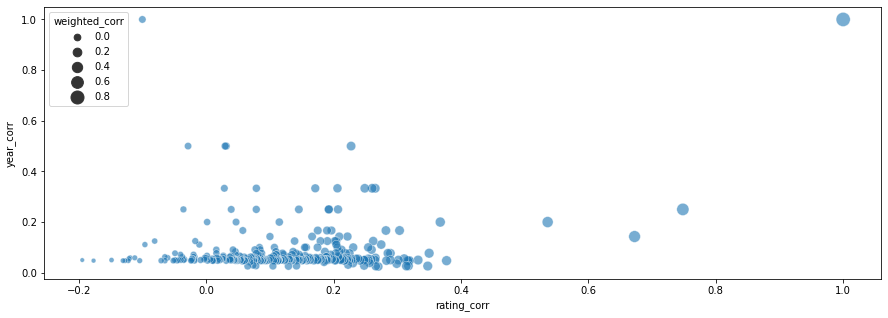

In [49]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=sorted_df,x='rating_corr', y='year_corr', size='weighted_corr',
                sizes=(20, 200),alpha=0.6)

In [35]:
print('If you liked Star Wars then you should check this movies: ')
print("\n")
for i in range(5):
    print(f"{i + 1}: " + sorted_df.index[i + 1])

If you liked Star Wars then you should check this movies: 


1: Empire Strikes Back, The (1980)
2: Return of the Jedi (1983)
3: Raiders of the Lost Ark (1981)
4: Sting, The (1973)
5: Austin Powers: International Man of Mystery (1997)
